# 基于Scikit-learn的模型
**注意：本文件为本小组对比探究用例，并非主要的探究内容，内容大部分由AI生成**

为保证代码运行的稳定性，建议您使用以下版本的python及其库：

| 名称 | python | numpy | pandas | matplotlib | seaborn | sklearn |
| ------- | ------- | ------- | ------- | ------- | ------- | ------- |
| 版本号 | 3.11.13 | 2.3.1 | 2.3.1 | 3.10.3 | 0.13.2 | 1.7.0 |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def load_data(csv_type):
    if csv_type == "train":
        train_df = pd.read_csv('train.csv')
        train_df = train_df.drop("timecc", axis=1) # 全是0，无意义
        win_or_lose = train_df.iloc[:, 1].values.reshape(-1, 1)
        basic_data = train_df.iloc[:, 2:31].values
        return win_or_lose, basic_data
    elif csv_type == "test":
        test_df = pd.read_csv('test_template.csv')
        test_df = test_df.drop("timecc", axis=1)
        basic_data = test_df.iloc[:, 2:31].values
        return basic_data
    else:
        return 0 # 返回0，表示输入不合法

In [3]:
def writeDown(index, data):
    result_df = pd.DataFrame({
        'id': index,
        'win': data
    })
    result_df.to_csv('predictions.csv', index=False)
    print("预测结果已保存到 predictions.csv")

In [4]:
# 加载示例数据集
y, X = load_data("train")
y = y.reshape(-1, )

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# 构建多层感知机模型
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # 隐藏层大小
    activation='relu',         # 激活函数
    solver='adam',             # 优化算法
    max_iter=1000,             # 最大迭代次数
    random_state=42            # 随机种子
)

In [6]:
# 训练模型
mlp.fit(X_train_scaled, y_train)

# 预测
y_pred = mlp.predict(X_test_scaled)

# 评估模型
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14402
           1       0.85      0.84      0.85     14398

    accuracy                           0.85     28800
   macro avg       0.85      0.85      0.85     28800
weighted avg       0.85      0.85      0.85     28800



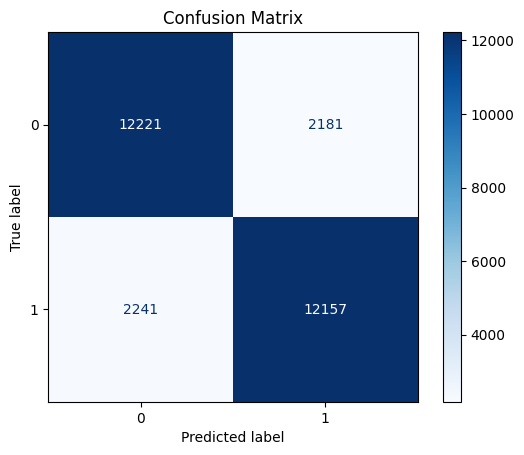

In [7]:
# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [8]:
test = load_data("test")
index = np.arange(144000, 180000)
test_scaled = scaler.transform(test)
data = mlp.predict(test_scaled).reshape(-1)
writeDown(index, data)

预测结果已保存到 predictions.csv
